In [29]:
from Models.Strict_S_Shape import Strict_S_Shape
from Models.S_Shape_Silva_Linear import S_Shape_Silva_Linear
from Results.results import compare_two_models

In [30]:
test_instance = [4, # num_aisles
                 4, # num_bays
                 2, # slot_capacity
                 1, # between_aisle_distance
                 1, # between_bay_distance
                 {1:[1,2,3,4,5], 2:[3,4,5,6,7], 3:[5,6,7,8,9], 4:[1,3,5,6,8], 5:[2,3,4,5,7], 6:[1,2,4,7,8], 7:[11,12,13,14,15]}] # orders

compare_two_models(Strict_S_Shape, S_Shape_Silva_Linear, test_instance)

The Strict_S_Shape model has a distance of 84.0, compared to a distance of 56.0 for the S_Shape_Silva_Linear model. Hence, the distance achieved by the S_Shape_Silva_Linear model is 28.0 units shorter, a 33.33% reduction in distance.
The Strict_S_Shape model has a runtime of 0.09 seconds, compared to a runtime of 1.83 seconds for the S_Shape_Silva_Linear model. Hence, the Strict_S_Shape model is 1.74 seconds faster, a 95.15% reduction in runtime.


In [1]:
from Functions.Instance_Generation import generate_instances
from Models.Strict_S_Shape import Strict_S_Shape
from Models.S_Shape_Silva_Linear import S_Shape_Silva_Linear

possible_instances = [[3,5,7,9], # aisle numbers
                      [3,5,7,9], # bay numbers
                      [1,3,5,10], # order numbers 
                      [3,4,5], # order sizes 
                      2, # slot capacity
                      1, # between aisle distance
                      1] # between bay distance
                      
all_instances = generate_instances(possible_instances[0],
                                   possible_instances[1],
                                   possible_instances[2],
                                   possible_instances[3],
                                   possible_instances[4],
                                   possible_instances[5],
                                   possible_instances[6])


model1_distances = []
model1_runtimes = []
model2_distances = []
model2_runtimes = []
instance_sizes = []

for i in range(1, len(all_instances)+1):
    instance = all_instances[i]
    print(instance)
    _, model1_distance, model1_runtime, _ = Strict_S_Shape(instance[0],
                                                           instance[1],
                                                           instance[2], 
                                                           instance[3],
                                                           instance[4],
                                                           instance[5])
    
    _, model2_distance, model2_runtime, _ = S_Shape_Silva_Linear(instance[0],
                                                                 instance[1],
                                                                 instance[2], 
                                                                 instance[3],
                                                                 instance[4],
                                                                 instance[5])
    
    instance_size = instance[0] * instance[1] * len(instance[5]) * len(instance[5][1])

    model1_distances.append(model1_distance)
    model1_runtimes.append(round(model1_runtime,3))
    model2_distances.append(model2_distance)
    model2_runtimes.append(round(model2_runtime,3))
    instance_sizes.append(instance_size)

[3, 3, 2, 1, 1, {1: [14, 8, 13]}]
Set parameter ServerPassword
Set parameter TokenServer to value "10.42.67.199"
[3, 3, 2, 1, 1, {1: [4, 1, 3, 2]}]
[3, 3, 2, 1, 1, {1: [14, 6, 4, 3, 7]}]
[3, 3, 2, 1, 1, {1: [11, 6, 15], 2: [9, 6, 1], 3: [13, 17, 15]}]
[3, 3, 2, 1, 1, {1: [10, 7, 17, 16], 2: [5, 14, 18, 13], 3: [16, 15, 3, 13]}]
[3, 3, 2, 1, 1, {1: [1, 11, 5, 12, 3], 2: [14, 6, 12, 4, 18], 3: [9, 18, 10, 7, 11]}]
[3, 3, 2, 1, 1, {1: [18, 7, 3], 2: [2, 4, 15], 3: [13, 11, 9], 4: [4, 8, 14], 5: [2, 1, 9]}]
[3, 3, 2, 1, 1, {1: [11, 3, 13, 4], 2: [17, 13, 6, 12], 3: [4, 2, 8, 11], 4: [15, 3, 12, 14], 5: [15, 7, 18, 12]}]
[3, 3, 2, 1, 1, {1: [2, 12, 6, 4, 7], 2: [3, 17, 2, 10, 7], 3: [14, 11, 17, 1, 3], 4: [11, 14, 18, 15, 10], 5: [18, 4, 9, 2, 12]}]
[3, 3, 2, 1, 1, {1: [13, 15, 10], 2: [4, 6, 7], 3: [4, 2, 12], 4: [9, 14, 18], 5: [10, 14, 4], 6: [8, 1, 18], 7: [10, 9, 15], 8: [14, 3, 13], 9: [12, 2, 6], 10: [10, 12, 2]}]
[3, 3, 2, 1, 1, {1: [14, 4, 10, 7], 2: [7, 15, 2, 5], 3: [17, 8, 9, 7]

AttributeError: Unable to retrieve attribute 'X'

In [70]:
# creating the metrics

distance_gaps = []
fractional_distance_gaps = []
runtime_gaps = []
fractional_runtime_gaps = []


for i in range(len(model1_distances)):
    distance_gaps.append(model1_distances[i] - model2_distances[i])
    fractional_distance_gaps.append(round((model1_distances[i] - model2_distances[i])/model2_distances[i],2))
    runtime_gaps.append(round(model2_runtimes[i] - model1_runtimes[i],2))
    fractional_runtime_gaps.append(round((model2_runtimes[i] - model1_runtimes[i])/model1_runtimes[i]))

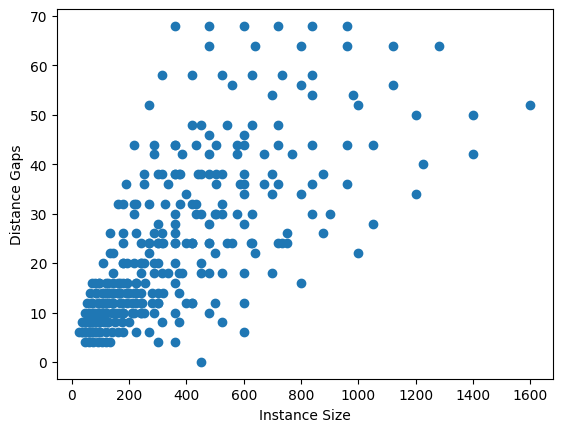

In [71]:
import matplotlib.pyplot as plt

plt.xlabel("Instance Size")
plt.ylabel("Distance Gaps")
plt.scatter(instance_sizes, distance_gaps)


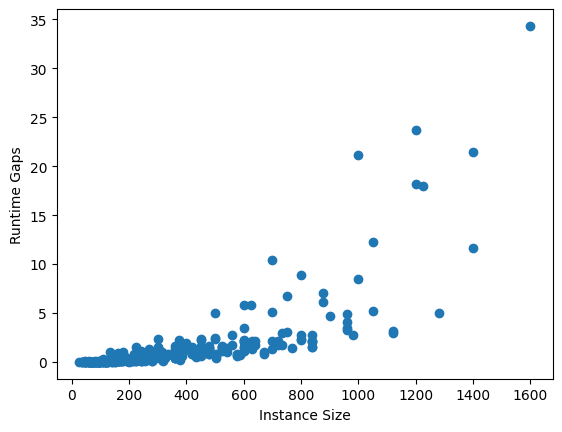

In [72]:
plt.xlabel("Instance Size")
plt.ylabel("Runtime Gaps")
plt.scatter(instance_sizes, runtime_gaps)

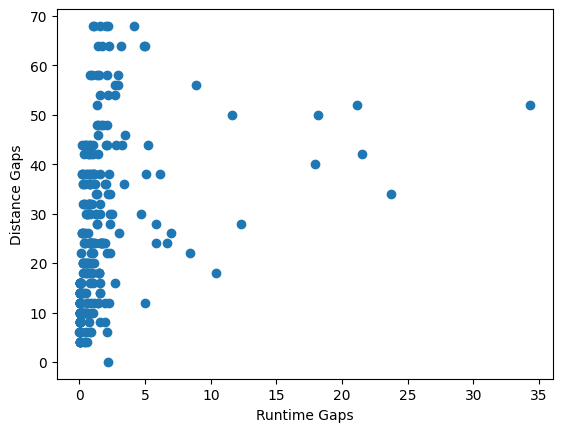

In [69]:
plt.xlabel("Runtime Gaps")
plt.ylabel("Distance Gaps")
plt.scatter(runtime_gaps, distance_gaps)

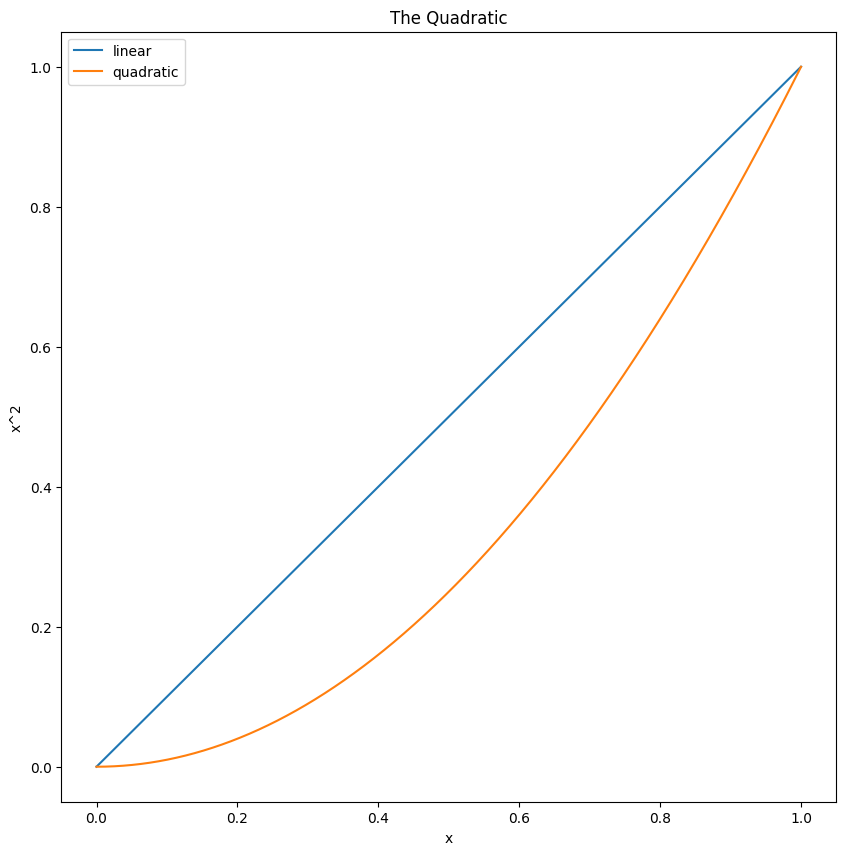

In [82]:
import numpy as np

x = np.arange(0, 1, 0.0001)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, x, label = "linear")
ax.plot(x, x**2, label = "quadratic")
ax.set_xlabel("x")
ax.set_ylabel("x^2")
ax.set_title("The Quadratic")
ax.legend()
